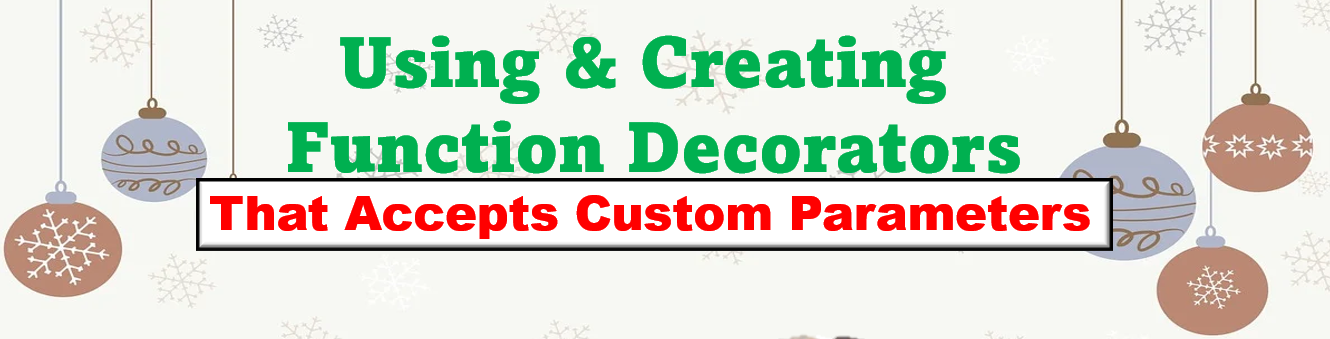

______________________
### Demo notebook not intended for production.  
### Use at your own risk.
______________________

## Adding Custom Parameters to a Decorator:
### - These are parameters not passed to the decorated function, just to the decorator itself!
### - Let's you set parameters that will change he behavior or the decorator.
### - The extra information to be used by the decorator for display or logging or whatever.

In [101]:
from enum import Enum

class T_Shirt_Size(Enum):
    SMALL = 1
    MEDIUM = 2
    LARGE = 3
    XLARGE = 4

In [102]:
x = T_Shirt_Size.MEDIUM
x

<T_Shirt_Size.MEDIUM: 2>

In [103]:
y = T_Shirt_Size

In [ ]:
y.MEDIUM

### Use Case

- Create a function decorator that will add try/except functionality to a given function.
- Include the following decorator custom parameters:
    - a message string - any string value the developer wants to pass.
    - a verbosity level indicating how much noise or messages we want to output: 
         - (DEBUG - lots, INFO - Most, Minimal - very few messages)

In [ ]:
from enum import Enum

class Verbosity(Enum):
    DEBUG = 1
    INFO = 2
    MINIMAL = 3

def try_catch_decorator(message1:str='default', message_level: Verbosity = Verbosity.DEBUG):
    
    def try_catch(func):
        """Run the function in a try/exception block."""

        def wrapper_trycatch(*args, **kwargs):

            print('Message Level: ', message_level)
            
            if message_level == Verbosity.DEBUG or message_level == Verbosity.INFO:
                print(f'Before the function {func.__name__!r} is called.')
            
            if message_level == Verbosity.DEBUG:
                print('Arguments are:', args)
                print('Key Word Arguments are:', kwargs)
                
            try:
                value = func(*args, **kwargs)
                print('Function Execution Succeeded.')
            except Exception as _exc:
                print(f"Error: Function {func.__name__!r} execution failed!")
                print("Error Details: ", _exc)
                return False

            return value

        return wrapper_trycatch

    return try_catch

In [104]:
@try_catch_decorator("Trapping Errors with Try/Except")
def divide_numbers(x, y):
    return x / y

In [105]:
print(divide_numbers(3,5))

Message Level:  Verbosity.DEBUG
Before the function 'divide_numbers' is called.
Arguments are: (3, 5)
Key Word Arguments are: {}
Function Execution Succeeded.
0.6


In [106]:
divide_numbers(3,0)

Message Level:  Verbosity.DEBUG
Before the function 'divide_numbers' is called.
Arguments are: (3, 0)
Key Word Arguments are: {}
Error: Function 'divide_numbers' execution failed!
Error Details:  division by zero


False

In [107]:
@try_catch_decorator("Trapping Errors with Try/Except", Verbosity.MINIMAL)
def divide_numbers(x, y):
    return x / y

In [108]:
divide_numbers(3,0)

Message Level:  Verbosity.MINIMAL
Error: Function 'divide_numbers' execution failed!
Error Details:  division by zero


False

### Another Example: Using Custom Decorator Parameters to add type checking to a function.

In [ ]:
def checktype_decorator(dataType, message1, message2):
    def decorator(fun):
        print(message1)
        def wrapper(*args, **kwargs):
            print(message2)
            if all([type(arg) == dataType for arg in args]):
                return fun(*args, **kwargs)
            return "Error: Invalid Input"
        return wrapper
    return decorator

In [109]:
@checktype_decorator(str, "Decorator for 'stringJoin'", "stringJoin started ...")
def stringJoin(*args):
    st = ''
    for i in args:
        st += i
    return st

Decorator for 'stringJoin'


In [110]:
stringJoin('one', 'two')

stringJoin started ...


'onetwo'

In [111]:
stringJoin(2, 5)

stringJoin started ...


'Error: Invalid Input'

In [112]:
@checktype_decorator(int, "Decorator for 'listAdd'", "listAdd started ...")
def listAdd(*args):
    l = []
    for i in args:
        l.append(i)
    return l

Decorator for 'listAdd'


In [113]:
listAdd(1,2,3)

listAdd started ...


[1, 2, 3]

In [114]:
listAdd('x', 'y')

listAdd started ...


'Error: Invalid Input'

## Adding Custom Parameters to a Decorator:
### - These are parameters not passed to the decorated function, just to the decorator itself!
### - Let's you set parameters that will change he behavior or the decorator.
### - The extra information to be used by the decorator for display or logging or whatever.